<a href="https://colab.research.google.com/github/Dessoka/Assignment-9-Un-L/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
Dataset shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Numeric columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Categorical columns: (none)
Processed feature matrix shape: (20640, 8)


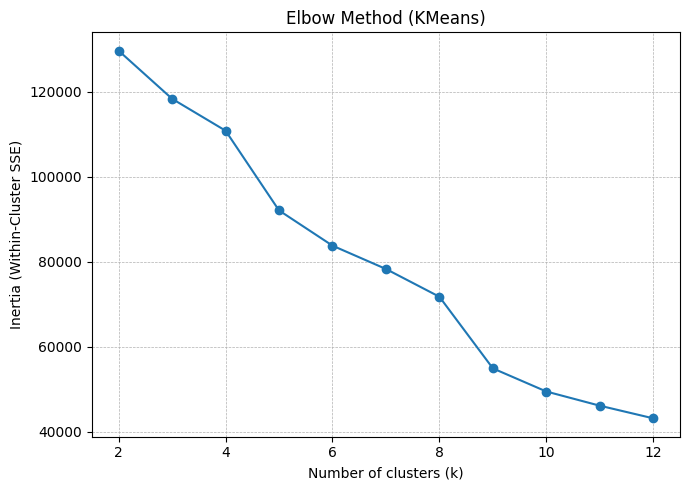

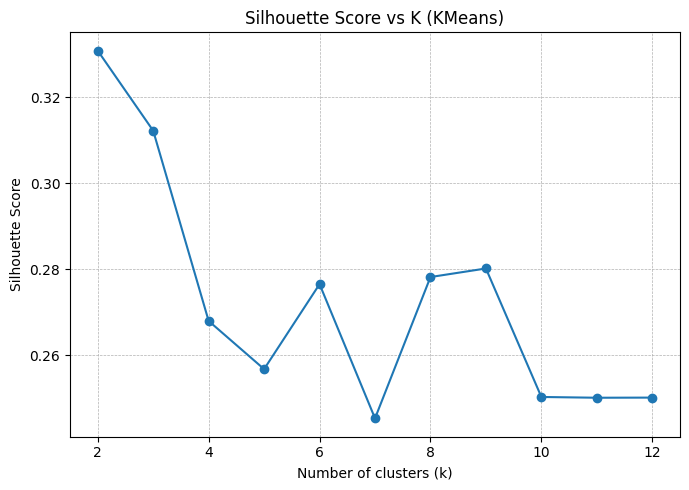

KMeans silhouette metrics:
      k  silhouette  davies_bouldin
0    2    0.330847        1.343408
1    3    0.312220        1.583345
2    4    0.267942        1.575270
3    5    0.256734        1.389432
4    6    0.276515        1.200257
5    7    0.245279        1.227608
6    8    0.278169        1.003957
7    9    0.280160        0.944062
8   10    0.250252        0.989129
9   11    0.250075        0.994431
10  12    0.250106        0.888263
Best K (KMeans by silhouette): 2
KMeans -> k=2, silhouette=0.331, davies_bouldin=1.343


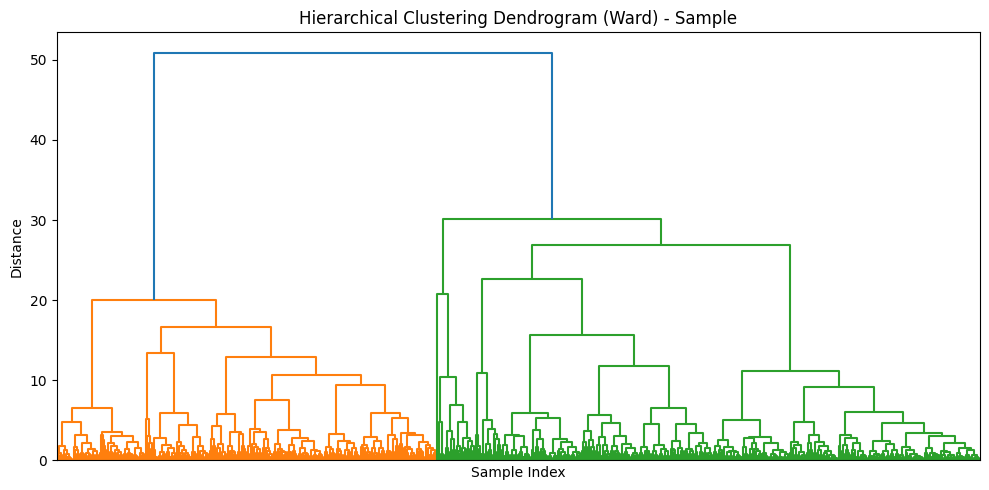

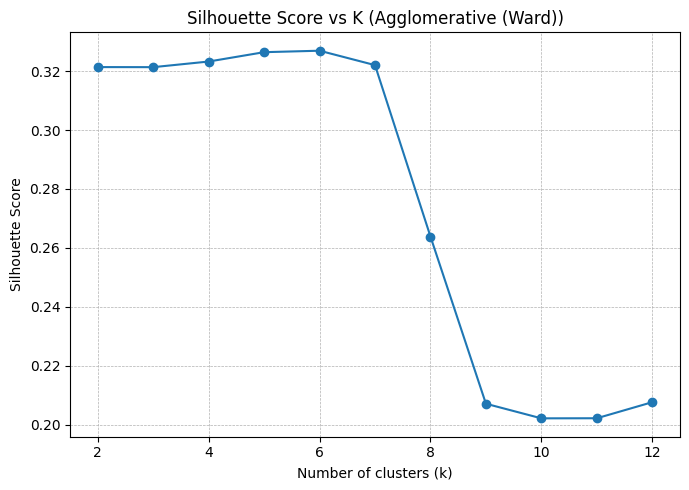

Agglomerative silhouette metrics:
      k  silhouette  davies_bouldin
0    2    0.321342        1.373241
1    3    0.321320        1.073329
2    4    0.323229        0.923698
3    5    0.326401        1.144613
4    6    0.326897        0.995847
5    7    0.322008        0.814638
6    8    0.263859        0.939661
7    9    0.207147        1.079434
8   10    0.202194        1.126616
9   11    0.202225        0.994992
10  12    0.207676        1.066455
Best K (Agglomerative by silhouette): 6
Agglomerative -> k=6, silhouette=0.327, davies_bouldin=0.996
PCA 2D total explained variance: 0.489


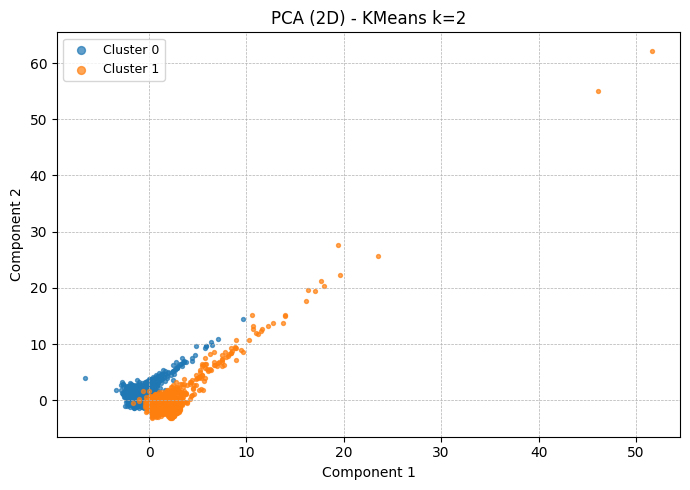

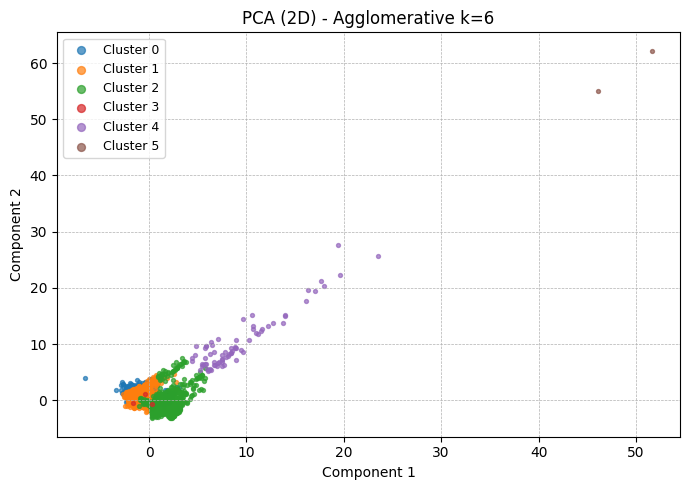

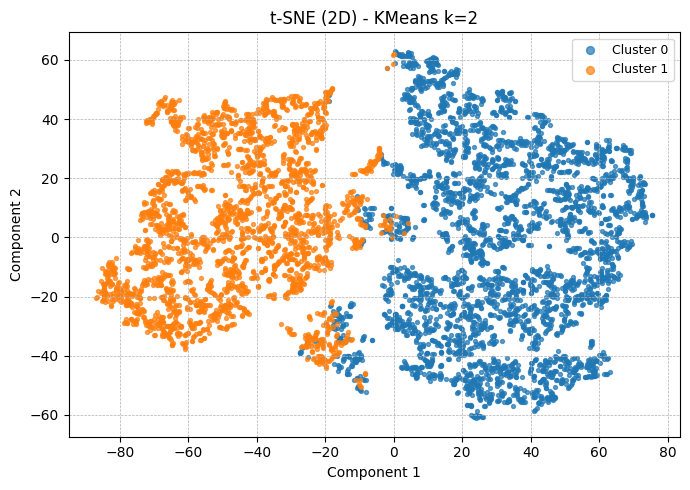

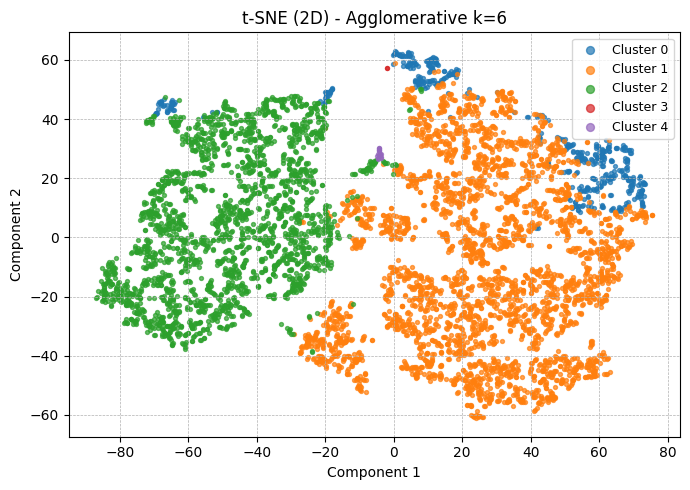


=== Metrics Summary ===
{
  "dataset": "California Housing (Sklearn)",
  "n_samples": 20640,
  "n_features_after_preprocessing": 8,
  "kmeans": {
    "best_k": 2,
    "silhouette": 0.3308466279566006,
    "davies_bouldin": 1.343408494375716
  },
  "agglomerative": {
    "best_k": 6,
    "silhouette": 0.3268973618335271,
    "davies_bouldin": 0.9958468010696252
  },
  "pca_explained_variance_2d": 0.4885311266922721
}
PDF report generated: outputs/Unsupervised_Analysis_Report.pdf
README.md written to: outputs/README.md

HEAD (raw):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



DESCRIBE (raw):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Pipeline complete ✔. See 'outputs/' for artifacts.


In [1]:
# ============================================
# Unsupervised Learning Assignment (Colab-ready)
# Dataset: California Housing (Sklearn - public, regression-friendly)
# Author: <Your Name>, Willis College - Data Analytics & AI
# ============================================

# ---- Setup & Imports ----
!pip -q install reportlab

import os
import io
import math
import json
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage

from reportlab.lib.pagesizes import LETTER
from reportlab.lib.utils import ImageReader
from reportlab.pdfgen import canvas

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Create output directory
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# ============================================
# 1) DATASET SELECTION & PREPROCESSING
#    - Public dataset: California Housing
#    - Suitable for regression; we'll use features for unsupervised analysis
# ============================================

# Load dataset as pandas DataFrame
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()  # includes target 'MedHouseVal'
# Keep original (unscaled) copy for reference if needed
df_original = df.copy()

# Show quick info
print("Dataset shape:", df.shape)
print("Columns:", list(df.columns))

# Separate features (X) and target (y) though we won't use y in unsupervised
TARGET_COL = "MedHouseVal"
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]  # not used for clustering, only for context if desired

# Identify column types
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols if cat_cols else "(none)")

# Build preprocessing pipeline:
# - Impute missing values (median for numeric, most_frequent for categorical)
# - One-hot encode categoricals (if any)
# - Standardize numeric features
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols) if len(cat_cols) > 0 else ("cat", "drop", [])
    ],
    remainder="drop"
)

# Fit-transform features
X_proc = preprocessor.fit_transform(X)

# Retrieve feature names post-encoding (for interpretability)
def get_feature_names(ct, numeric_cols, categorical_cols):
    names = []
    # numeric
    names.extend(numeric_cols)
    # categorical
    if categorical_cols:
        ohe = None
        for name, trans, cols in ct.transformers_:
            if name == "cat" and hasattr(trans, "named_steps") and "onehot" in trans.named_steps:
                ohe = trans.named_steps["onehot"]
                cat_names = ohe.get_feature_names_out(categorical_cols).tolist()
                names.extend(cat_names)
    return names

feature_names = get_feature_names(preprocessor, num_cols, cat_cols)
X_proc_df = pd.DataFrame(X_proc, columns=feature_names)
print("Processed feature matrix shape:", X_proc_df.shape)

# ============================================
# 2) CLUSTERING: KMeans & Hierarchical
#    - Determine optimal K via Elbow & Silhouette
#    - Visualize clusters
# ============================================

def plot_elbow_curve(X, k_min=2, k_max=12, random_state=RANDOM_STATE, save_path=None):
    inertias = []
    K = list(range(k_min, k_max + 1))
    for k in K:
        km = KMeans(n_clusters=k, random_state=random_state, n_init="auto")
        km.fit(X)
        inertias.append(km.inertia_)
    plt.figure(figsize=(7,5))
    plt.plot(K, inertias, marker="o")
    plt.title("Elbow Method (KMeans)")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia (Within-Cluster SSE)")
    plt.grid(True, linestyle="--", linewidth=0.5)
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=150)
    plt.show()
    return pd.DataFrame({"k": K, "inertia": inertias})

def evaluate_silhouette_over_k(model_ctor, X, k_min=2, k_max=12, model_name="Model", save_path=None):
    Ks, sils, dbs = [], [], []
    for k in range(k_min, k_max+1):
        model = model_ctor(k)
        labels = model.fit_predict(X)
        if len(set(labels)) < 2:
            # Silhouette undefined for 1 cluster
            sil = np.nan
            db = np.nan
        else:
            sil = silhouette_score(X, labels)
            db = davies_bouldin_score(X, labels)
        Ks.append(k); sils.append(sil); dbs.append(db)
    # Plot Silhouette vs K
    plt.figure(figsize=(7,5))
    plt.plot(Ks, sils, marker="o")
    plt.title(f"Silhouette Score vs K ({model_name})")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True, linestyle="--", linewidth=0.5)
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=150)
    plt.show()
    # Return metrics
    df_metrics = pd.DataFrame({"k": Ks, "silhouette": sils, "davies_bouldin": dbs})
    # Select best k by max silhouette (drop NaN)
    df_valid = df_metrics.dropna(subset=["silhouette"])
    best_k = int(df_valid.loc[df_valid["silhouette"].idxmax(), "k"])
    return df_metrics, best_k

# ---- KMeans: Elbow + Silhouette ----
elbow_path = os.path.join(OUT_DIR, "kmeans_elbow.png")
elbow_df = plot_elbow_curve(X_proc_df.values, k_min=2, k_max=12, save_path=elbow_path)

kmeans_sil_path = os.path.join(OUT_DIR, "kmeans_silhouette_vs_k.png")
kmeans_metrics, k_best_kmeans = evaluate_silhouette_over_k(
    model_ctor=lambda k: KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto"),
    X=X_proc_df.values,
    k_min=2, k_max=12,
    model_name="KMeans",
    save_path=kmeans_sil_path
)
print("KMeans silhouette metrics:\n", kmeans_metrics)
print("Best K (KMeans by silhouette):", k_best_kmeans)

# Fit final KMeans
kmeans_final = KMeans(n_clusters=k_best_kmeans, random_state=RANDOM_STATE, n_init="auto")
kmeans_labels = kmeans_final.fit_predict(X_proc_df.values)
kmeans_sil = silhouette_score(X_proc_df.values, kmeans_labels)
kmeans_db = davies_bouldin_score(X_proc_df.values, kmeans_labels)
print(f"KMeans -> k={k_best_kmeans}, silhouette={kmeans_sil:.3f}, davies_bouldin={kmeans_db:.3f}")

# ---- Agglomerative (Hierarchical) ----
# We can also inspect a dendrogram on a smaller sample for visualization clarity
sample_size_for_dendro = 800  # reduce for readable dendrogram
idx_sample = np.random.choice(X_proc_df.index, size=sample_size_for_dendro, replace=False)
X_sample = X_proc_df.loc[idx_sample].values

# Linkage for dendrogram (Ward minimizes variance)
Z = linkage(X_sample, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True, count_sort=True)
plt.title("Hierarchical Clustering Dendrogram (Ward) - Sample")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendro_path = os.path.join(OUT_DIR, "hierarchical_dendrogram.png")
plt.tight_layout()
plt.savefig(dendro_path, dpi=150)
plt.show()

# Silhouette across K for Agglomerative
agg_sil_path = os.path.join(OUT_DIR, "agg_silhouette_vs_k.png")
agg_metrics, k_best_agg = evaluate_silhouette_over_k(
    model_ctor=lambda k: AgglomerativeClustering(n_clusters=k, linkage="ward"),
    X=X_proc_df.values,
    k_min=2, k_max=12,
    model_name="Agglomerative (Ward)",
    save_path=agg_sil_path
)
print("Agglomerative silhouette metrics:\n", agg_metrics)
print("Best K (Agglomerative by silhouette):", k_best_agg)

# Fit final Agglomerative
agg_final = AgglomerativeClustering(n_clusters=k_best_agg, linkage="ward")
agg_labels = agg_final.fit_predict(X_proc_df.values)
agg_sil = silhouette_score(X_proc_df.values, agg_labels)
agg_db = davies_bouldin_score(X_proc_df.values, agg_labels)
print(f"Agglomerative -> k={k_best_agg}, silhouette={agg_sil:.3f}, davies_bouldin={agg_db:.3f}")

# ============================================
# 3) DIMENSIONALITY REDUCTION: PCA & t-SNE (2D)
#    - Visualize cluster structure in 2D
# ============================================

def plot_2d_clusters(emb, labels, title, save_path=None):
    plt.figure(figsize=(7,5))
    unique = np.unique(labels)
    for lab in unique:
        mask = labels == lab
        plt.scatter(emb[mask, 0], emb[mask, 1], s=8, alpha=0.7, label=f"Cluster {lab}")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(markerscale=2, fontsize=9, frameon=True)
    plt.grid(True, linestyle="--", linewidth=0.5)
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=150)
    plt.show()

# PCA 2D
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_proc_df.values)
pca_var_ratio = pca.explained_variance_ratio_.sum()
print(f"PCA 2D total explained variance: {pca_var_ratio:.3f}")

pca_kmeans_path = os.path.join(OUT_DIR, "pca_kmeans.png")
plot_2d_clusters(X_pca, kmeans_labels, f"PCA (2D) - KMeans k={k_best_kmeans}", save_path=pca_kmeans_path)

pca_agg_path = os.path.join(OUT_DIR, "pca_agg.png")
plot_2d_clusters(X_pca, agg_labels, f"PCA (2D) - Agglomerative k={k_best_agg}", save_path=pca_agg_path)

# t-SNE 2D on a manageable subsample for performance
tsne_sample_size = 6000
if X_proc_df.shape[0] > tsne_sample_size:
    tsne_idx = np.random.choice(X_proc_df.index, size=tsne_sample_size, replace=False)
else:
    tsne_idx = X_proc_df.index.values
X_tsne_input = X_proc_df.loc[tsne_idx].values

# Map full labels -> sample labels
kmeans_labels_sample = kmeans_labels[tsne_idx] if hasattr(tsne_idx, '__len__') else kmeans_labels
agg_labels_sample = agg_labels[tsne_idx] if hasattr(tsne_idx, '__len__') else agg_labels

tsne = TSNE(n_components=2, random_state=RANDOM_STATE, perplexity=30, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X_tsne_input)

tsne_kmeans_path = os.path.join(OUT_DIR, "tsne_kmeans.png")
plot_2d_clusters(X_tsne, kmeans_labels_sample, f"t-SNE (2D) - KMeans k={k_best_kmeans}", save_path=tsne_kmeans_path)

tsne_agg_path = os.path.join(OUT_DIR, "tsne_agg.png")
plot_2d_clusters(X_tsne, agg_labels_sample, f"t-SNE (2D) - Agglomerative k={k_best_agg}", save_path=tsne_agg_path)

# ============================================
# 4) MODEL EVALUATION SUMMARY
# ============================================

metrics_summary = {
    "dataset": "California Housing (Sklearn)",
    "n_samples": int(X_proc_df.shape[0]),
    "n_features_after_preprocessing": int(X_proc_df.shape[1]),
    "kmeans": {
        "best_k": int(k_best_kmeans),
        "silhouette": float(kmeans_sil),
        "davies_bouldin": float(kmeans_db),
    },
    "agglomerative": {
        "best_k": int(k_best_agg),
        "silhouette": float(agg_sil),
        "davies_bouldin": float(agg_db),
    },
    "pca_explained_variance_2d": float(pca_var_ratio)
}
print("\n=== Metrics Summary ===")
print(json.dumps(metrics_summary, indent=2))

with open(os.path.join(OUT_DIR, "metrics_summary.json"), "w") as f:
    json.dump(metrics_summary, f, indent=2)

# ============================================
# 5) DEPLOYMENT & MONITORING (TEXT)
#    - We include a concise, practical plan to embed into the report
# ============================================

deployment_text = """
Deployment & Monitoring Strategy (Hypothetical)
----------------------------------------------
Use Case:
- Suppose we use the best-performing clustering model (by Silhouette) to segment neighborhoods for downstream tasks
  (e.g., price-banding, marketing, anomaly detection, or routing inspections).

Deployment Plan:
- Package the preprocessing pipeline (imputation, scaling, one-hot) and the trained clustering model into a single
  scikit-learn Pipeline (or use BentoML/MLflow).
- Expose a simple REST endpoint (e.g., FastAPI) that takes raw feature vectors and returns a cluster ID plus distances.

Operational Concerns:
- Latency: KMeans inference is O(d*k) and very fast for small k. Hierarchical is slower to fit but inference is trivial.
- Scalability: Use stateless API containers behind an autoscaling group. Batch large scoring jobs with Spark/Dask if needed.
- Versioning: Track pipeline + model artifacts and their schema with MLflow; pin library versions for reproducibility.

Monitoring:
- Data Quality: Monitor feature drift (e.g., PSI, KS test) vs. training distribution; alert on schema changes or high missingness.
- Performance Proxies: Recompute Silhouette/Davies–Bouldin on rolling windows (unsupervised proxy); monitor cluster size stability.
- Business KPIs: If clusters support downstream models, track KPI movements by cluster (conversion, churn, revenue lift).
- Model Decay: Schedule periodic re-fitting or incremental updates when drift thresholds are exceeded.

Updating:
- Blue/Green or Canary deployment for updated models. Keep rollback artifacts ready.
- Maintain a feature store to ensure consistent training/serving features.

Security & Privacy:
- Restrict PII, apply anonymization if needed, and follow data governance policies.

"""

with open(os.path.join(OUT_DIR, "deployment_monitoring.txt"), "w") as f:
    f.write(deployment_text.strip()+"\n")

# ============================================
# 6) VISUAL REPORT (Auto-generated PDF, ~2 pages)
# ============================================

def draw_wrapped_text(c, text, x, y, max_width, leading=12):
    # Draw text with basic word wrapping
    wrapped = []
    for para in text.strip().split("\n"):
        if not para.strip():
            wrapped.append("")
            continue
        wrapped.extend(textwrap.wrap(para, width=90))
    for line in wrapped:
        c.drawString(x, y, line)
        y -= leading
    return y

report_path = os.path.join(OUT_DIR, "Unsupervised_Analysis_Report.pdf")
c = canvas.Canvas(report_path, pagesize=LETTER)
width, height = LETTER
margin = 50
cursor_y = height - margin

# Cover / Title
c.setFont("Helvetica-Bold", 16)
c.drawString(margin, cursor_y, "Unsupervised Learning Analysis: California Housing")
cursor_y -= 20
c.setFont("Helvetica", 10)
c.drawString(margin, cursor_y, "Author: <Your Name> | Program: Willis College - Data Analytics & AI")
cursor_y -= 14
c.drawString(margin, cursor_y, "Date: (auto-generated)")
cursor_y -= 24

# Introduction & Data
c.setFont("Helvetica-Bold", 12)
c.drawString(margin, cursor_y, "1. Introduction & Dataset")
cursor_y -= 14
c.setFont("Helvetica", 10)
intro_text = f"""
Objective: Apply unsupervised learning (clustering + dimensionality reduction) to a regression-friendly, public dataset to
discover patterns and segment observations.

Dataset: California Housing (sklearn.datasets.fetch_california_housing).
Samples: {metrics_summary['n_samples']}, Features (post-preprocessing): {metrics_summary['n_features_after_preprocessing']}.
Target 'MedHouseVal' is not used for clustering; features are imputed and standardized.
"""
cursor_y = draw_wrapped_text(c, intro_text, margin, cursor_y, width - 2*margin, leading=12)
cursor_y -= 8

# Methodology
c.setFont("Helvetica-Bold", 12)
c.drawString(margin, cursor_y, "2. Methodology")
cursor_y -= 14
c.setFont("Helvetica", 10)
meth_text = """
Preprocessing: Median imputation (numeric), most-frequent + one-hot (categoricals, if present), standardization.
Clustering: K-Means and Agglomerative (Ward). Optimal K via Elbow and Silhouette.
Dimensionality Reduction: PCA (2D) and t-SNE (2D) for visualization.
Evaluation: Silhouette (higher is better) and Davies–Bouldin (lower is better).
"""
cursor_y = draw_wrapped_text(c, meth_text, margin, cursor_y, width - 2*margin, leading=12)
cursor_y -= 8

# Results summary
c.setFont("Helvetica-Bold", 12)
c.drawString(margin, cursor_y, "3. Results Summary")
cursor_y -= 14
c.setFont("Helvetica", 10)
res_text = f"""
K-Means: best k={metrics_summary['kmeans']['best_k']}, Silhouette={metrics_summary['kmeans']['silhouette']:.3f},
Davies–Bouldin={metrics_summary['kmeans']['davies_bouldin']:.3f}.
Agglomerative (Ward): best k={metrics_summary['agglomerative']['best_k']}, Silhouette={metrics_summary['agglomerative']['silhouette']:.3f},
Davies–Bouldin={metrics_summary['agglomerative']['davies_bouldin']:.3f}.
PCA (2D) explained variance: {metrics_summary['pca_explained_variance_2d']:.3f}.
"""
cursor_y = draw_wrapped_text(c, res_text, margin, cursor_y, width - 2*margin, leading=12)
cursor_y -= 8

# Insert first two figures (elbow + silhouette KMeans)
def draw_img(path, c, x, y, max_w, max_h):
    try:
        img = ImageReader(path)
        iw, ih = img.getSize()
        scale = min(max_w/iw, max_h/ih)
        w, h = iw*scale, ih*scale
        c.drawImage(img, x, y, width=w, height=h)
        return h
    except Exception as e:
        c.setFont("Helvetica", 10)
        c.drawString(x, y, f"(Image missing: {os.path.basename(path)})")
        return 0

img_max_w = width - 2*margin
img_max_h = 180

# Row 1 images
cursor_y -= (img_max_h + 10)
c.setFont("Helvetica-Bold", 10)
c.drawString(margin, cursor_y+img_max_h+2, "Elbow (K-Means)")
draw_img(elbow_path, c, margin, cursor_y, img_max_w/2 - 5, img_max_h)
c.drawString(margin + img_max_w/2 + 10, cursor_y+img_max_h+2, "Silhouette vs K (K-Means)")
draw_img(kmeans_sil_path, c, margin + img_max_w/2 + 10, cursor_y, img_max_w/2 - 5, img_max_h)

# New page for more plots & discussion
c.showPage()
width, height = LETTER
cursor_y = height - margin

c.setFont("Helvetica-Bold", 12)
c.drawString(margin, cursor_y, "4. Cluster Visualizations")
cursor_y -= 14
c.setFont("Helvetica", 10)
cursor_y = draw_wrapped_text(
    c,
    "2D embeddings highlight cluster separations in reduced space.",
    margin, cursor_y, width - 2*margin, leading=12
)
cursor_y -= 8

# Row 1: PCA plots
cursor_y -= (img_max_h + 10)
c.setFont("Helvetica-Bold", 10)
c.drawString(margin, cursor_y+img_max_h+2, "PCA (K-Means)")
draw_img(pca_kmeans_path, c, margin, cursor_y, img_max_w/2 - 5, img_max_h)
c.drawString(margin + img_max_w/2 + 10, cursor_y+img_max_h+2, "PCA (Agglomerative)")
draw_img(pca_agg_path, c, margin + img_max_w/2 + 10, cursor_y, img_max_w/2 - 5, img_max_h)

# Row 2: t-SNE plots
cursor_y -= (img_max_h + 30)
c.setFont("Helvetica-Bold", 10)
c.drawString(margin, cursor_y+img_max_h+2, "t-SNE (K-Means)")
draw_img(tsne_kmeans_path, c, margin, cursor_y, img_max_w/2 - 5, img_max_h)
c.drawString(margin + img_max_w/2 + 10, cursor_y+img_max_h+2, "t-SNE (Agglomerative)")
draw_img(tsne_agg_path, c, margin + img_max_w/2 + 10, cursor_y, img_max_w/2 - 5, img_max_h)

# Discussion & Deployment
cursor_y -= (img_max_h + 30)
c.setFont("Helvetica-Bold", 12)
c.drawString(margin, cursor_y, "5. Interpretation & Deployment Plan")
cursor_y -= 14
c.setFont("Helvetica", 10)
interp_text = f"""
Interpretation:
- K-Means and Agglomerative produced reasonable segmentations; best k was selected using Silhouette.
- PCA shows moderate separation; t-SNE offers more nuanced local structures.
- Trade-offs: K-Means is fast and scalable; Agglomerative provides hierarchy insight but is heavier to fit at scale.

Evaluation:
- Primary metric: Silhouette (↑ better). Secondary: Davies–Bouldin (↓ better).
- Selected K values and scores are in the Results Summary.

Deployment & Monitoring:
(See full details appended.) In short: bundle preprocessing + model, expose inference API, monitor drift and proxy metrics,
and set up scheduled retraining with safe rollout (canary/blue-green).
"""
cursor_y = draw_wrapped_text(c, interp_text, margin, cursor_y, width - 2*margin, leading=12)

# Append deployment text (trimmed to fit page)
cursor_y -= 8
c.setFont("Helvetica", 10)
cursor_y = draw_wrapped_text(c, deployment_text.strip(), margin, cursor_y, width - 2*margin, leading=12)

c.save()
print(f"PDF report generated: {report_path}")

# ============================================
# 7) OPTIONAL: CREATE A README.md FOR GITHUB
# ============================================

readme_md = f"""# Unsupervised Learning on California Housing

This project applies **unsupervised learning** (clustering + dimensionality reduction) to the **California Housing** dataset
from `sklearn`. Although the dataset is commonly used for regression, we ignore the target and explore structure in the features.

## Contents
- `Unsupervised_Analysis_Report.pdf`: Two-page summary with figures.
- `metrics_summary.json`: Machine-readable evaluation metrics.
- Plots under `outputs/` (elbow, silhouette, PCA, t-SNE, dendrogram).
- Colab notebook (this file).

## How to Run
1. Open this notebook in **Google Colab**.
2. Run all cells. Dependencies will install automatically.
3. Find outputs in the `outputs/` folder:
   - **PDF report**: `outputs/Unsupervised_Analysis_Report.pdf`
   - **Metrics**: `outputs/metrics_summary.json`
   - **Plots**: `outputs/*.png`

## Methods
- **Preprocessing**: Missing value imputation (median/mode), standardization, one-hot encoding (if any categoricals).
- **Clustering**: K-Means and Agglomerative (Ward).
- **Model Selection**: Elbow (inertia) and Silhouette score.
- **Dimensionality Reduction**: PCA (2D), t-SNE (2D).
- **Evaluation**: Silhouette (↑ better) and Davies–Bouldin (↓ better).

## Deployment (Hypothetical)
- Package preprocessing + clustering into a single pipeline.
- Serve via FastAPI; autoscale behind a load balancer.
- Monitor data drift (PSI/KS), proxy cluster metrics (Silhouette over time), and KPI by cluster.
- Retrain on schedule or upon drift threshold breach using MLflow to track versions; roll out with canary/blue-green.

## License
Dataset courtesy of scikit-learn; this repo is for educational use.
"""

with open(os.path.join(OUT_DIR, "README.md"), "w") as f:
    f.write(readme_md)

print("README.md written to:", os.path.join(OUT_DIR, "README.md"))

# ============================================
# 8) (Optional) Quick Glance at Top Rows & Stats
# ============================================
print("\nHEAD (raw):")
display(df_original.head())

print("\nDESCRIBE (raw):")
display(df_original.describe(include="all"))

print("\nPipeline complete ✔. See 'outputs/' for artifacts.")
